# Analyse results from Pypsa-Earth
This notebook reads the latest optimization described in the config.yaml file and makes plots and summaries of the results.

## Import packages

INFO:pypsa.io:Imported network base_s_5_elec_lv2.0_1H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
/home/lkims/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



(<matplotlib.collections.PatchCollection at 0x7e90105db9b0>,
 <matplotlib.collections.LineCollection at 0x7e90105c4440>)

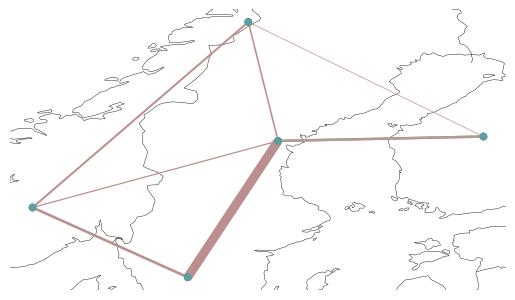

In [2]:
import pypsa

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches

n = pypsa.Network('base_s_5_elec_lv2.0_1H.nc') 

bus_scale = 5e3 
line_scale = 2e3

n.plot(
    line_widths=n.lines.s_nom / line_scale,
    link_widths=n.links.p_nom / line_scale,
)

In [3]:
n.storage_units

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge,cyclic_state_of_charge_per_period,max_hours,efficiency_store,efficiency_dispatch,standing_loss,inflow,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NO0 0 PHS,NO0 0,PQ,,234.300000,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,2401.987623,0.866025,0.866025,0.0,0.0,0.0
SE0 1 PHS,SE0 1,PQ,,92.000000,0.0,False,0.0,inf,-1.0,1.0,...,False,NaN,True,True,783.913043,0.866025,0.866025,0.0,0.0,0.0
FI0 0 hydro,FI0 0,PQ,,1171.000000,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,4696.840307,0.000000,0.900000,0.0,0.0,0.0
NO0 0 hydro,NO0 0,PQ,,25155.220000,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,1589.474446,0.000000,0.900000,0.0,0.0,0.0
NO0 1 hydro,NO0 1,PQ,,5166.840000,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,3217.305390,0.000000,0.900000,0.0,0.0,0.0
SE0 0 hydro,SE0 0,PQ,,10236.495587,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,3106.849911,0.000000,0.900000,0.0,0.0,0.0
SE0 1 hydro,SE0 1,PQ,,642.691038,0.0,False,0.0,inf,0.0,1.0,...,False,NaN,True,True,3106.849911,0.000000,0.900000,0.0,0.0,0.0


In [4]:
n.generators.groupby(['carrier']).p_nom.sum()

carrier
CCGT              3638.600000
biomass           4261.940000
coal              1661.809044
nuclear          12979.000000
offwind-ac         120.332874
offwind-dc         124.089725
offwind-float      111.930689
oil                777.000000
onwind           19800.390000
ror               3642.100000
solar             1584.825000
solar-hsat           0.000000
Name: p_nom, dtype: float64

In [5]:
n.storage_units.groupby(['carrier']).p_nom.sum()

carrier
PHS        326.300000
hydro    42372.246625
Name: p_nom, dtype: float64

In [6]:
n.loads_t.p_set

Load,FI0 0,NO0 0,NO0 1,SE0 0,SE0 1
snapshot,,,,,
2020-01-01 00:00:00,18474.800018,27102.540161,4471.239944,13144.571869,16575.428116
2020-01-01 01:00:00,18282.400009,26664.951157,4399.048737,12910.163269,16279.836594
2020-01-01 02:00:00,18297.399963,26483.900223,4369.179825,12564.300064,15843.699982
2020-01-01 03:00:00,18412.600021,26302.814713,4339.305313,12616.489075,15909.510818
2020-01-01 04:00:00,18864.599991,26177.850616,4318.689346,12611.181946,15902.818176
...,...,...,...,...,...
2020-12-31 19:00:00,19585.477646,29420.016159,4853.565430,14711.023224,18550.737747
2020-12-31 20:00:00,20023.435501,28638.078903,4724.565384,14135.824417,17825.406723
2020-12-31 21:00:00,19289.258865,28183.670120,4649.599319,13457.129639,16969.566391


In [7]:
n.carriers.drop("", inplace=True)

In [8]:
n.carriers

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
AC,0.0000,#70af1d,AC,inf,0.0
DC,0.0000,#8a1caf,DC,inf,0.0
biomass,0.0000,#baa741,biomass,inf,0.0
nuclear,0.0000,#ff8c00,nuclear,inf,0.0
CCGT,0.1980,#a85522,Combined-Cycle Gas,inf,0.0
oil,0.2571,#c9c9c9,oil,inf,0.0
coal,0.3361,#545454,coal,inf,0.0
offwind-float,0.0000,#b5e2fa,Offshore Wind (Floating),inf,0.0
onwind,0.0000,#235ebc,Onshore Wind,inf,0.0


/home/lkims/miniconda3/envs/pypsa-eur/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning:

facecolor will have no effect as it has been defined as "never".



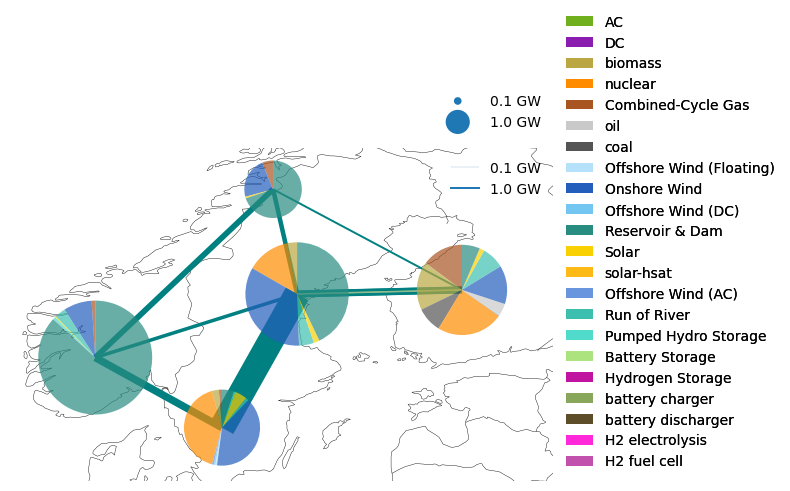

In [9]:
# Scale settings
bus_scale = 5e3 
line_scale = 7e2

# Legend settings
bus_sizes = [100, 1000]  # in MW
line_sizes = [100, 1000]  # in MW

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": ccrs.EqualEarth(n.buses.x.mean())})
gen = n.generators[n.generators.carrier != "load"].groupby(["bus", "carrier"]).p_nom.sum()
sto = n.storage_units.groupby(["bus", "carrier"]).p_nom.sum()
buses = pd.concat([gen, sto])

with plt.rc_context({"patch.linewidth": 0.}):
    n.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=n.lines.s_nom / line_scale,
        link_widths=n.links.p_nom / line_scale,
        line_colors="teal",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )

add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw={"bbox_to_anchor": (1, 1.2), "frameon": False},    
)
add_legend_lines(
    ax,
    [s / (line_scale ) for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 1), "frameon": False},
)
add_legend_patches(
    ax,
    n.carriers.color,
    n.carriers.nice_name,
    legend_kw={"bbox_to_anchor": (1, 0), "frameon": False, "loc":"lower left"},
)
fig.tight_layout()

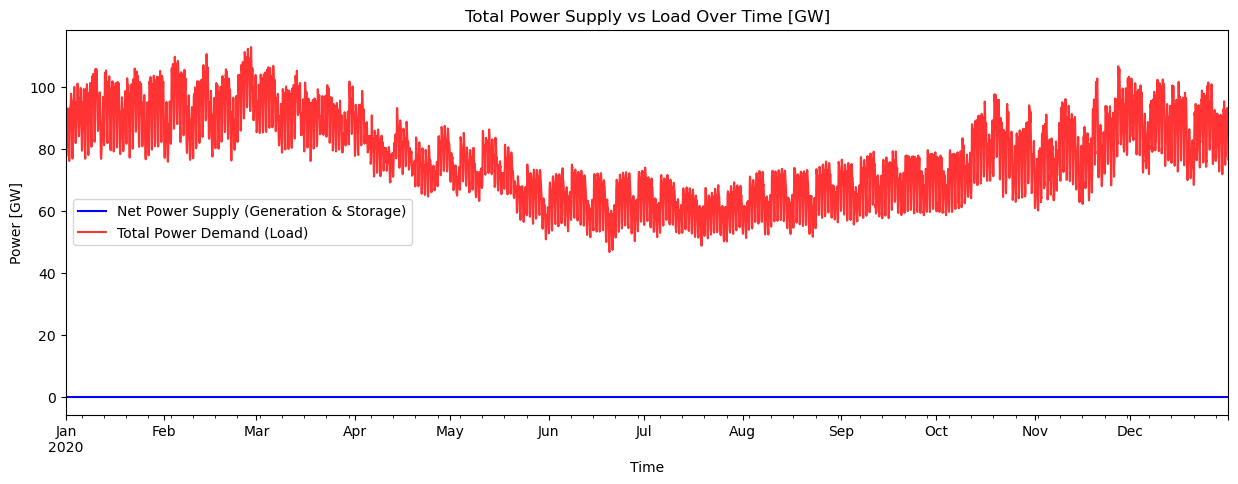

Total generation over a year: 0.00 TWh
Total load over a year: 2046.04 TWh


In [10]:
# Sum the generation, storage units and stores
total_generation_storage = (n.generators_t.p_set.sum(axis=1) + n.storage_units_t.p_set.sum(axis=1) + n.stores_t.p_set.sum(axis=1)) / 1e3

# Sum the load
total_load = (n.loads_t.p_set.sum(axis=1)) / 1e3

# Plot the combined total generation, storage units, and load
plt.figure(figsize=(15, 5))
total_generation_storage.plot(label='Net Power Supply (Generation & Storage)', color='blue')
total_load.plot(label='Total Power Demand (Load)', color='red', alpha=0.8)
plt.title('Total Power Supply vs Load Over Time [GW]')
plt.xlabel('Time')
plt.ylabel('Power [GW]')
plt.legend()
plt.show()

#Calculate the total generation over a year multiple by 3, because the time step is 3 hours
total_generation_year = total_generation_storage.sum() * 3 / 1e3 # TWh
print(f'Total generation over a year: {total_generation_year:.2f} TWh')

# Calculate the total load over a year multiple by 3, because the time step is 3 hours
total_load_year = total_load.sum() * 3 / 1e3 # TWh
print(f'Total load over a year: {total_load_year:.2f} TWh')